##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [359]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [360]:
silhouette= [
	10,	338, 297, 332, 284, 251, 389, 356, 454, 323, 361, 288,
	397, 365, 379, 378, 400, 377, 152, 148, 176, 149, 150, 136,
	172, 58,	132, 93,	234, 127, 162, 21,	54,	103, 67,	109,
]

lipsUpperOuter= [61, 185, 40, 39, 37, 0, 267, 269, 270, 409, 291,]
lipsLowerOuter= [146, 91, 181, 84, 17, 314, 405, 321, 375, 291,]
lipsUpperInner= [78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308,]
lipsLowerInner= [78, 95, 88, 178, 87, 14, 317, 402, 318, 324, 308,]

rightEyeUpper0= [246, 161, 160, 159, 158, 157, 173,]
rightEyeLower0= [33, 7, 163, 144, 145, 153, 154, 155, 133,]
rightEyeUpper1= [247, 30, 29, 27, 28, 56, 190,]
rightEyeLower1= [130, 25, 110, 24, 23, 22, 26, 112, 243,]
rightEyeUpper2= [113, 225, 224, 223, 222, 221, 189,]
rightEyeLower2= [226, 31, 228, 229, 230, 231, 232, 233, 244,]
rightEyeLower3= [143, 111, 117, 118, 119, 120, 121, 128, 245,]

rightEyebrowUpper= [156, 70, 63, 105, 66, 107, 55, 193,]
rightEyebrowLower= [35, 124, 46, 53, 52, 65,]

rightEyeIris= [473, 474, 475, 476, 477,]

leftEyeUpper0= [466, 388, 387, 386, 385, 384, 398,]
leftEyeLower0= [263, 249, 390, 373, 374, 380, 381, 382, 362,]
leftEyeUpper1= [467, 260, 259, 257, 258, 286, 414,]
leftEyeLower1= [359, 255, 339, 254, 253, 252, 256, 341, 463,]
leftEyeUpper2= [342, 445, 444, 443, 442, 441, 413,]
leftEyeLower2= [446, 261, 448, 449, 450, 451, 452, 453, 464,]
leftEyeLower3= [372, 340, 346, 347, 348, 349, 350, 357, 465,]

leftEyebrowUpper= [383, 300, 293, 334, 296, 336, 285, 417,]
leftEyebrowLower= [265, 353, 276, 283, 282, 295,]

leftEyeIris= [468, 469, 470, 471, 472,]

midwayBetweenEyes= [168,]

noseTip= [1,]
noseBottom= [2,]
noseRightCorner= [98,]
noseLeftCorner= [327,]

rightCheek= [205,]
leftCheek= [425,]

mouthOuter = [
		164, 167, 98, 165, 203, 206, 92, 216, 186, 57, 212, 43, 202, 
		106, 204, 182, 194, 83, 201, 18, 200, 313, 421, 406, 418, 335, 
		424, 273, 422, 287, 432, 410, 436, 322, 426, 423, 391, 327, 393,
]
#Importar DrawingSpec
# import mediapipe as mp
# drawing_spec = mp.solutions.drawing_utils.DrawingSpec(thickness=2, circle_radius=2, color=(244, 195, 56))

# # mp.solutions.drawing_styles.get_default_face_mesh_tesselation_style()
# list(mp.solutions.face_mesh.FACEMESH_TESSELATION)
# # Crear un diccionario como keys los pares de puntos y como values drawing_spec
# face_mesh_tesselation_style = {}
# for i in mp.solutions.face_mesh.FACEMESH_TESSELATION:
# 	face_mesh_tesselation_style[i] = drawing_spec
# face_mesh_tesselation_style
mp.solutions.drawing_styles.get_default_face_mesh_tesselation_style()

DrawingSpec(color=(128, 128, 128), thickness=1, circle_radius=2)

# Face Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect face landmarks from images.

## Preparation

Let's start with installing MediaPipe.

In [361]:
# !pip install -q mediapipe==0.10.0

Then download the off-the-shelf model bundle(s). Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/face_landmarker#models) for more information about these model bundles.

In [362]:
# !wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task
# iterate set mp.solutions.face_mesh.FACEMESH_LIPS

# foo = list(mp.solutions.face_mesh.FACEMESH_LIPS)
# points = list(map(lambda x: x[0], foo))

## Visualization utilities

In [363]:
#@markdown We implemented some functions to visualize the face landmark detection results. <br/> Run the following cell to activate the functions.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt

from operator import itemgetter


def draw_landmarks_on_image(rgb_image, detection_result):
	face_landmarks_list = detection_result.face_landmarks
	annotated_image = np.copy(rgb_image)

	# get the face landmarks from mouthOuter list index
	# face = face_landmarks_list[0]
	

	# for face in face_landmarks_list:
 	# # Copy the image and cut out the face with mouthOuter list index
	# 	# get the points from the face landmarks
	# 	points = itemgetter(*mouthOuter)(face)
	# 	# get the min and max x and y values
	# 	x_min = min(points, key=lambda x: x.x).x
	# 	x_max = max(points, key=lambda x: x.x).x
	# 	_min = min(points, key=lambda x: x.y).y
	# 	_max = max(points, key=lambda x: x.y).y
	# 	# crop the image
	# 	p_image = np.copy(rgb_image)
	# 	p_image = cp_image[int(y_min * cp_image.shape[0]):int(y_max * cp_image.shape[0]), int(x_min * cp_image.shape[1]):int(x_max * cp_image.shape[1])]
	#  # resize the image
	# 	#	 cp_image = cv2.resize(cp_image, (256, 256))
	# 	# show the image
	# 	cv2_imshow(cv2.cvtColor(cp_image, cv2.COLOR_RGB2BGR))
		
	# 	# for point in itemgetter(*mouthOuter)(face):
	#   #   cv2.circle(annotated_image, (int(point.x * annotated_image.shape[1]), int(point.y * annotated_image.shape[0])), 3, (255, 0,0), -1)

  # Loop through the detected faces to visualize.
	for idx in range(len(face_landmarks_list)):
		face_landmarks = face_landmarks_list[idx]

		points = itemgetter(*mouthOuter)(face_landmarks)
		# get the min and max x and y values
		x_min = min(points, key=lambda x: x.x).x
		x_max = max(points, key=lambda x: x.x).x
		y_min = min(points, key=lambda x: x.y).y
		y_max = max(points, key=lambda x: x.y).y
		# crop the image
		cp_image = np.copy(rgb_image)
		cp_image = cp_image[int(y_min * cp_image.shape[0]):int(y_max * cp_image.shape[0]), int(x_min * cp_image.shape[1]):int(x_max * cp_image.shape[1])]
		# resize the image
		#   cp_image = cv2.resize(cp_image, (256, 256))
		# show the image
		cv2_imshow(cv2.cvtColor(cp_image, cv2.COLOR_RGB2BGR))

		# Draw the face landmarks.
		face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
		face_landmarks_proto.landmark.extend([
			landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
		])

		face_landmarks_mouth = landmark_pb2.NormalizedLandmarkList()
		face_landmarks_mouth.landmark.extend([
			landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in itemgetter(*mouthOuter)(face_landmarks)
		])

		solutions.drawing_utils.draw_landmarks(
			image=annotated_image,
			landmark_list=face_landmarks_proto,
			connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
			landmark_drawing_spec=None,
			connection_drawing_spec=mp.solutions.drawing_utils.
				DrawingSpec(thickness=1, circle_radius=0, color=(247, 197, 54)))

		for point in itemgetter(*mouthOuter)(face_landmarks):
			cv2.circle(annotated_image, (int(point.x * annotated_image.shape[1]), int(point.y * annotated_image.shape[0])), 2, (79, 225, 212), -1)
		# solutions.drawing_utils.draw_landmarks(
		# 	image=annotated_image,
		# 	landmark_list=face_landmarks_mouth,
		# 	landmark_drawing_spec=mp.solutions.drawing_utils.
		# 		DrawingSpec(thickness=1, circle_radius=1, color=(79, 225, 212),))
		
	

	return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
	# Extract the face blendshapes category names and scores.
	face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
	face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
	# The blendshapes are ordered in decreasing score value.
	face_blendshapes_ranks = range(len(face_blendshapes_names))

	fig, ax = plt.subplots(figsize=(12, 12))
	bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
	ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
	ax.invert_yaxis()

	# Label each bar with values
	for score, patch in zip(face_blendshapes_scores, bar.patches):
		plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

	ax.set_xlabel('Score')
	ax.set_title("Face Blendshapes")
	plt.tight_layout()
	plt.show()

## Download test image

Let's grab a test image that we'll use later. The image is from [Unsplash](https://unsplash.com/photos/mt2fyrdXxzk).

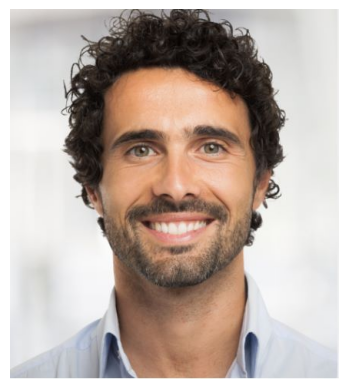

In [364]:
# !wget -q -O image.jpg https://storage.googleapis.com/mediapipe-assets/portrait.jpg

import cv2
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

def cv2_imshow(img):
	plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
	# plt.imshow(img)
	plt.axis('off')
	plt.show()

img = cv2.imread("face.jpg")
cv2_imshow(img)

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [365]:
# from google.colab import files
# uploaded = files.upload()

# for filename in uploaded:
#	content = uploaded[filename]
#	 with open(filename, 'wb') as f:
#		 f.write(content)

# if len(uploaded.keys()):
#	 IMAGE_FILE = next(iter(uploaded))
#	 print('Uploaded file:', IMAGE_FILE)

## Running inference and visualizing the results

Here are the steps to run face landmark detection using MediaPipe.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/face_landmarker/python) to learn more about configuration options that this task supports.


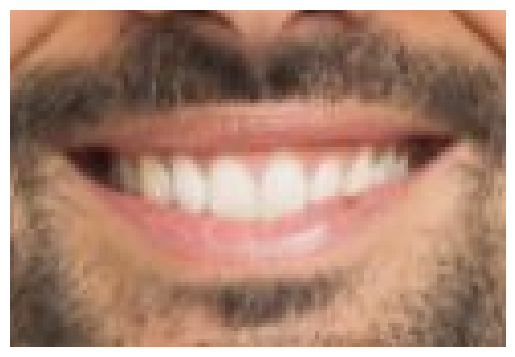

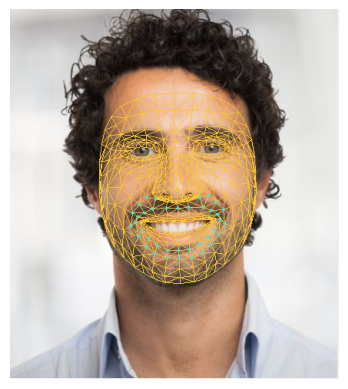

In [366]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
																			 output_face_blendshapes=True,
																			 output_facial_transformation_matrixes=True,
																			num_faces=2)
detector = vision.FaceLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("face.jpg")

# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

In [367]:
detection_result.face_blendshapes[0]

# Get all mouth blendshapes.
list(filter(lambda x: x.category_name.startswith('mouth'), detection_result.face_blendshapes[0]))

vars(detection_result.face_landmarks[0][0])

{'x': 0.5119904279708862,
 'y': 0.559702455997467,
 'z': -0.05357097461819649,
 'visibility': 0.0,
 'presence': 0.0}

We will also visualize the face blendshapes categories using a bar graph.

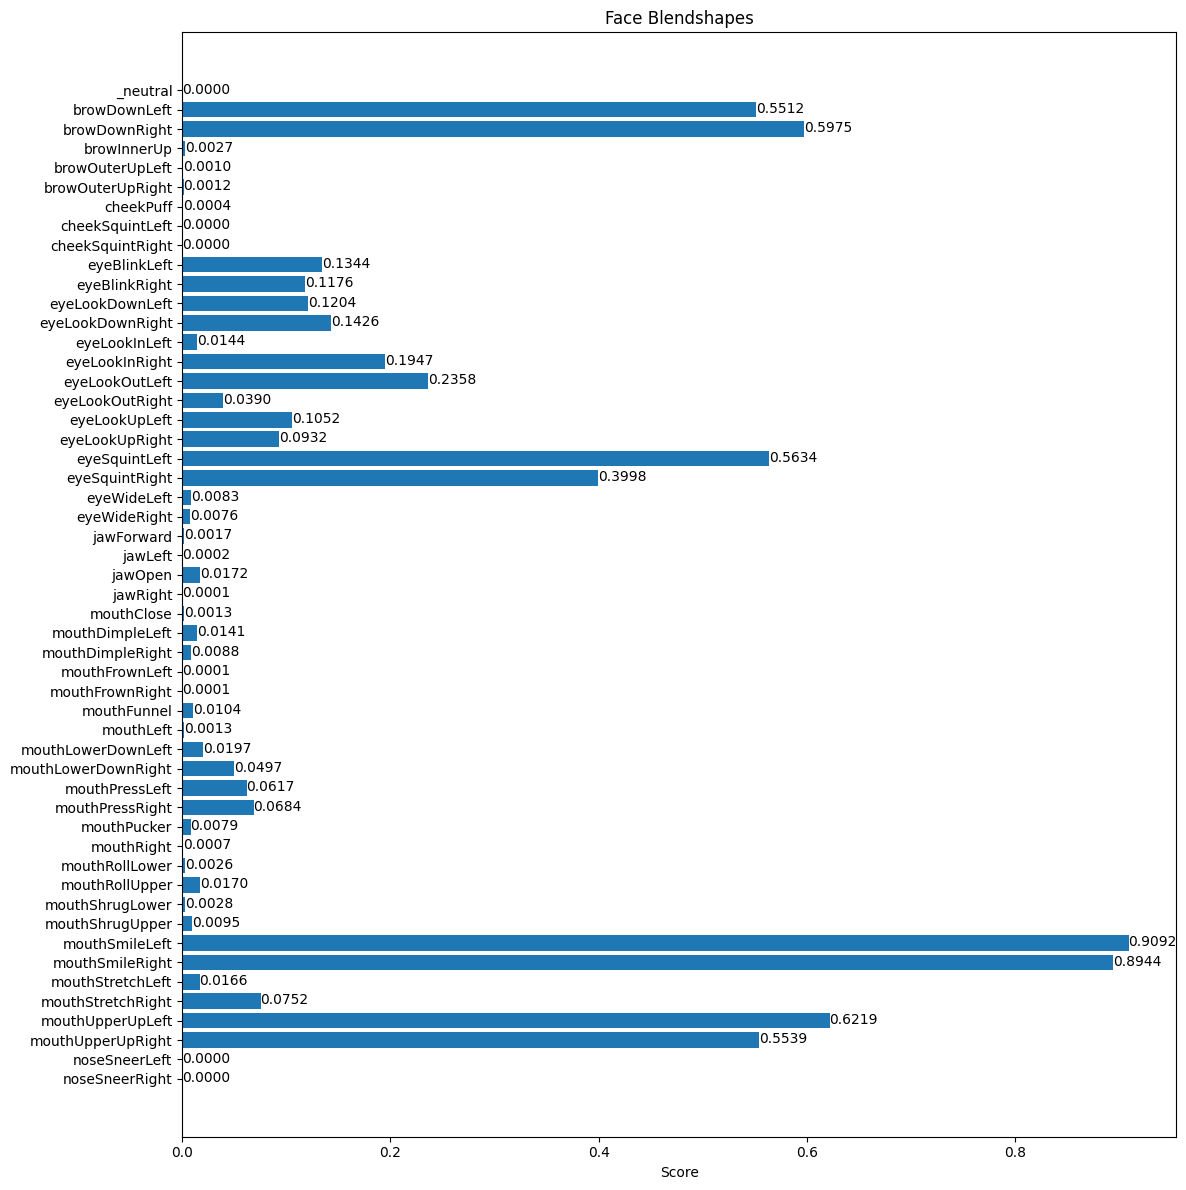

In [368]:
plot_face_blendshapes_bar_graph(detection_result.face_blendshapes[0])

And print the transformation matrix.

In [369]:
print(detection_result.facial_transformation_matrixes)

[array([[ 9.99479294e-01, -2.68878173e-02, -1.78499557e-02,
         2.98681319e-01],
       [ 2.64697224e-02,  9.99379277e-01, -2.32595373e-02,
         1.16949570e+00],
       [ 1.84642691e-02,  2.27749720e-02,  9.99570310e-01,
        -3.01234379e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])]
